In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# organize imports
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

C:\Users\USER\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:5

In [2]:
# seed for reproducing same results
# seed = 9
# np.random.seed(seed)

In [21]:
df = pd.read_csv("Data\\parkinsons.data")
data = df.copy()

In [22]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# df.isnull().sum()

In [9]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(data)

,Total,Percent
PPE,0,0.0
D2,0,0.0
MDVP:Fo(Hz),0,0.0
MDVP:Fhi(Hz),0,0.0
MDVP:Flo(Hz),0,0.0
MDVP:Jitter(%),0,0.0
MDVP:Jitter(Abs),0,0.0
MDVP:RAP,0,0.0
MDVP:PPQ,0,0.0
Jitter:DDP,0,0.0


# Feature selection

# A. Filter methods

## Univariate selection
Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable.

### f_classif

              Column      Score
18           spread1  90.424219
21               PPE  75.803195
19           spread2  50.343165
0        MDVP:Fo(Hz)  33.286577
2       MDVP:Flo(Hz)  32.612875
8       MDVP:Shimmer  30.122600
12          MDVP:APQ  29.536350
15               HNR  29.015927
11      Shimmer:APQ5  27.145033
9   MDVP:Shimmer(dB)  27.065484
10      Shimmer:APQ3  26.527120
13       Shimmer:DDA  26.525626
20                D2  25.265912
4   MDVP:Jitter(Abs)  25.001729
16              RPDE  20.310049
6           MDVP:PPQ  17.548533
3     MDVP:Jitter(%)  16.192809
5           MDVP:RAP  14.775226
7         Jitter:DDP  14.772666
17               DFA  10.952901
14               NHR   7.183270
1       MDVP:Fhi(Hz)   5.478255


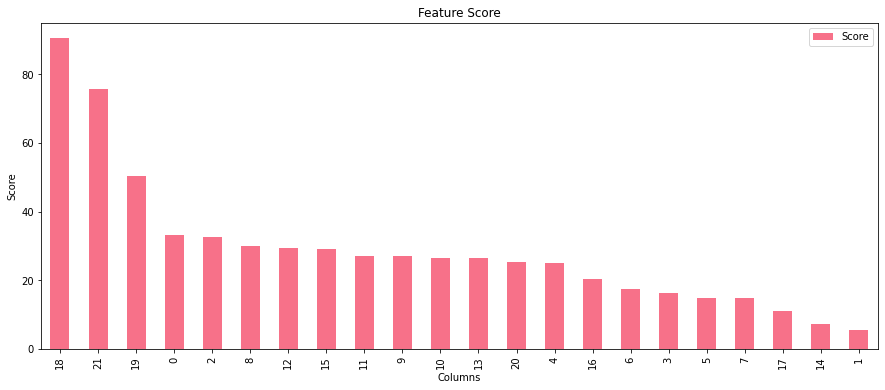

In [9]:
x = df.drop(['status', 'name'], axis = 1)
y = df.status

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

BestFeature = SelectKBest(score_func=f_classif, k=22)
fit = BestFeature.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']

featureScores

print(featureScores.nlargest(22,'Score'))

featureScores.nlargest(22,'Score').plot(kind='bar',figsize=(15,6),color=sns.color_palette("husl"))
plt.xlabel('Columns')
plt.ylabel('Score')
plt.title('Feature Score')
plt.show()

### mutual_info_classif

In [10]:
from sklearn.feature_selection import mutual_info_classif

BestFeature = SelectKBest(score_func=mutual_info_classif, k=22)
fit = BestFeature.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']

featureScores

print(featureScores.nlargest(22,'Score'))

              Column     Score
21               PPE  0.253982
18           spread1  0.221368
0        MDVP:Fo(Hz)  0.206593
19           spread2  0.192002
12          MDVP:APQ  0.181021
2       MDVP:Flo(Hz)  0.174088
1       MDVP:Fhi(Hz)  0.140713
4   MDVP:Jitter(Abs)  0.136180
15               HNR  0.132462
11      Shimmer:APQ5  0.117159
3     MDVP:Jitter(%)  0.114639
14               NHR  0.111565
13       Shimmer:DDA  0.108726
10      Shimmer:APQ3  0.106284
9   MDVP:Shimmer(dB)  0.103051
6           MDVP:PPQ  0.103029
8       MDVP:Shimmer  0.096967
17               DFA  0.095116
7         Jitter:DDP  0.093677
5           MDVP:RAP  0.090968
16              RPDE  0.037003
20                D2  0.017913


# Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.11312298 0.04511262 0.0599287  0.0239584  0.05696552 0.03505572
 0.02735972 0.03606103 0.03407771 0.03037824 0.02747899 0.02896074
 0.03720158 0.03687783 0.02723809 0.03698266 0.04045776 0.03864243
 0.0793715  0.05659487 0.03601915 0.09215375]


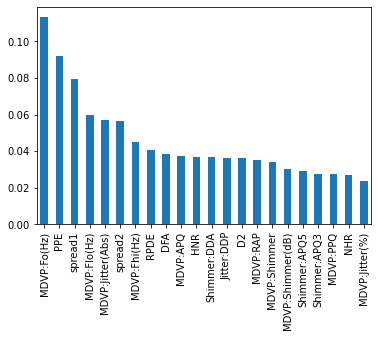

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(22).plot(kind='bar')
plt.show()

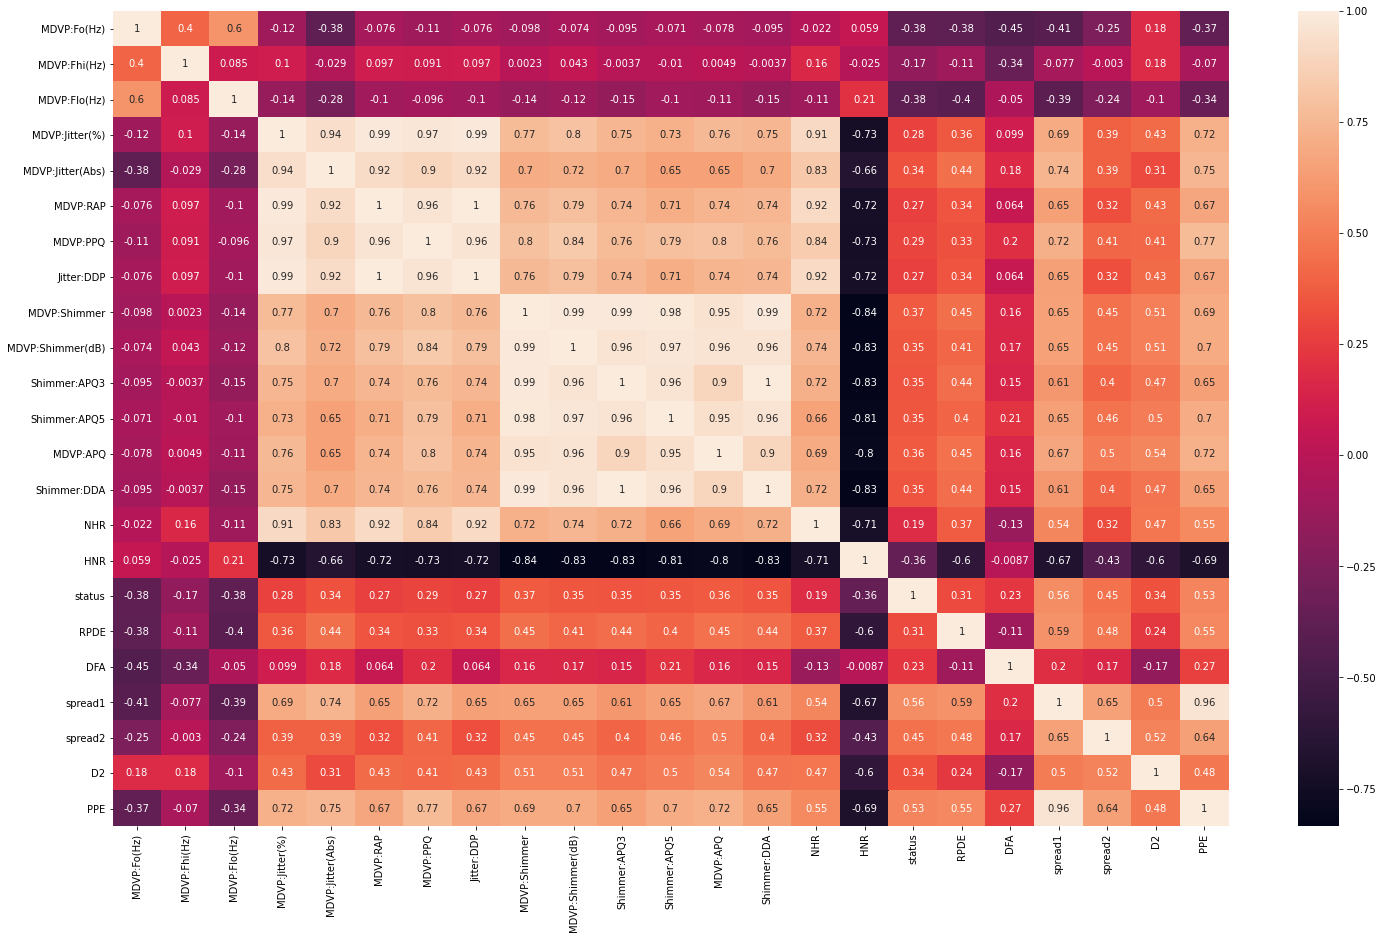

In [20]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr() ,annot=True)
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='count'>

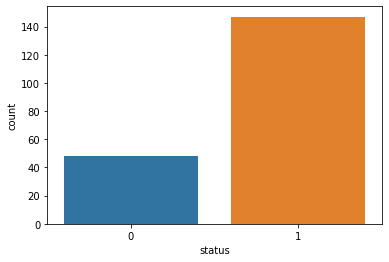

In [11]:
import seaborn as sns
sns.countplot(df['status'])

In [12]:
predictors = data.drop(['name'], axis = 1)

predictors = predictors.drop(['status'], axis = 1)
X = predictors
Y = data['status']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 7)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

array([[<AxesSubplot:title={'center':'MDVP:Fo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Fhi(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Flo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(%)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(Abs)'}>],
       [<AxesSubplot:title={'center':'MDVP:RAP'}>,
        <AxesSubplot:title={'center':'MDVP:PPQ'}>,
        <AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer(dB)'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'MDVP:APQ'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,

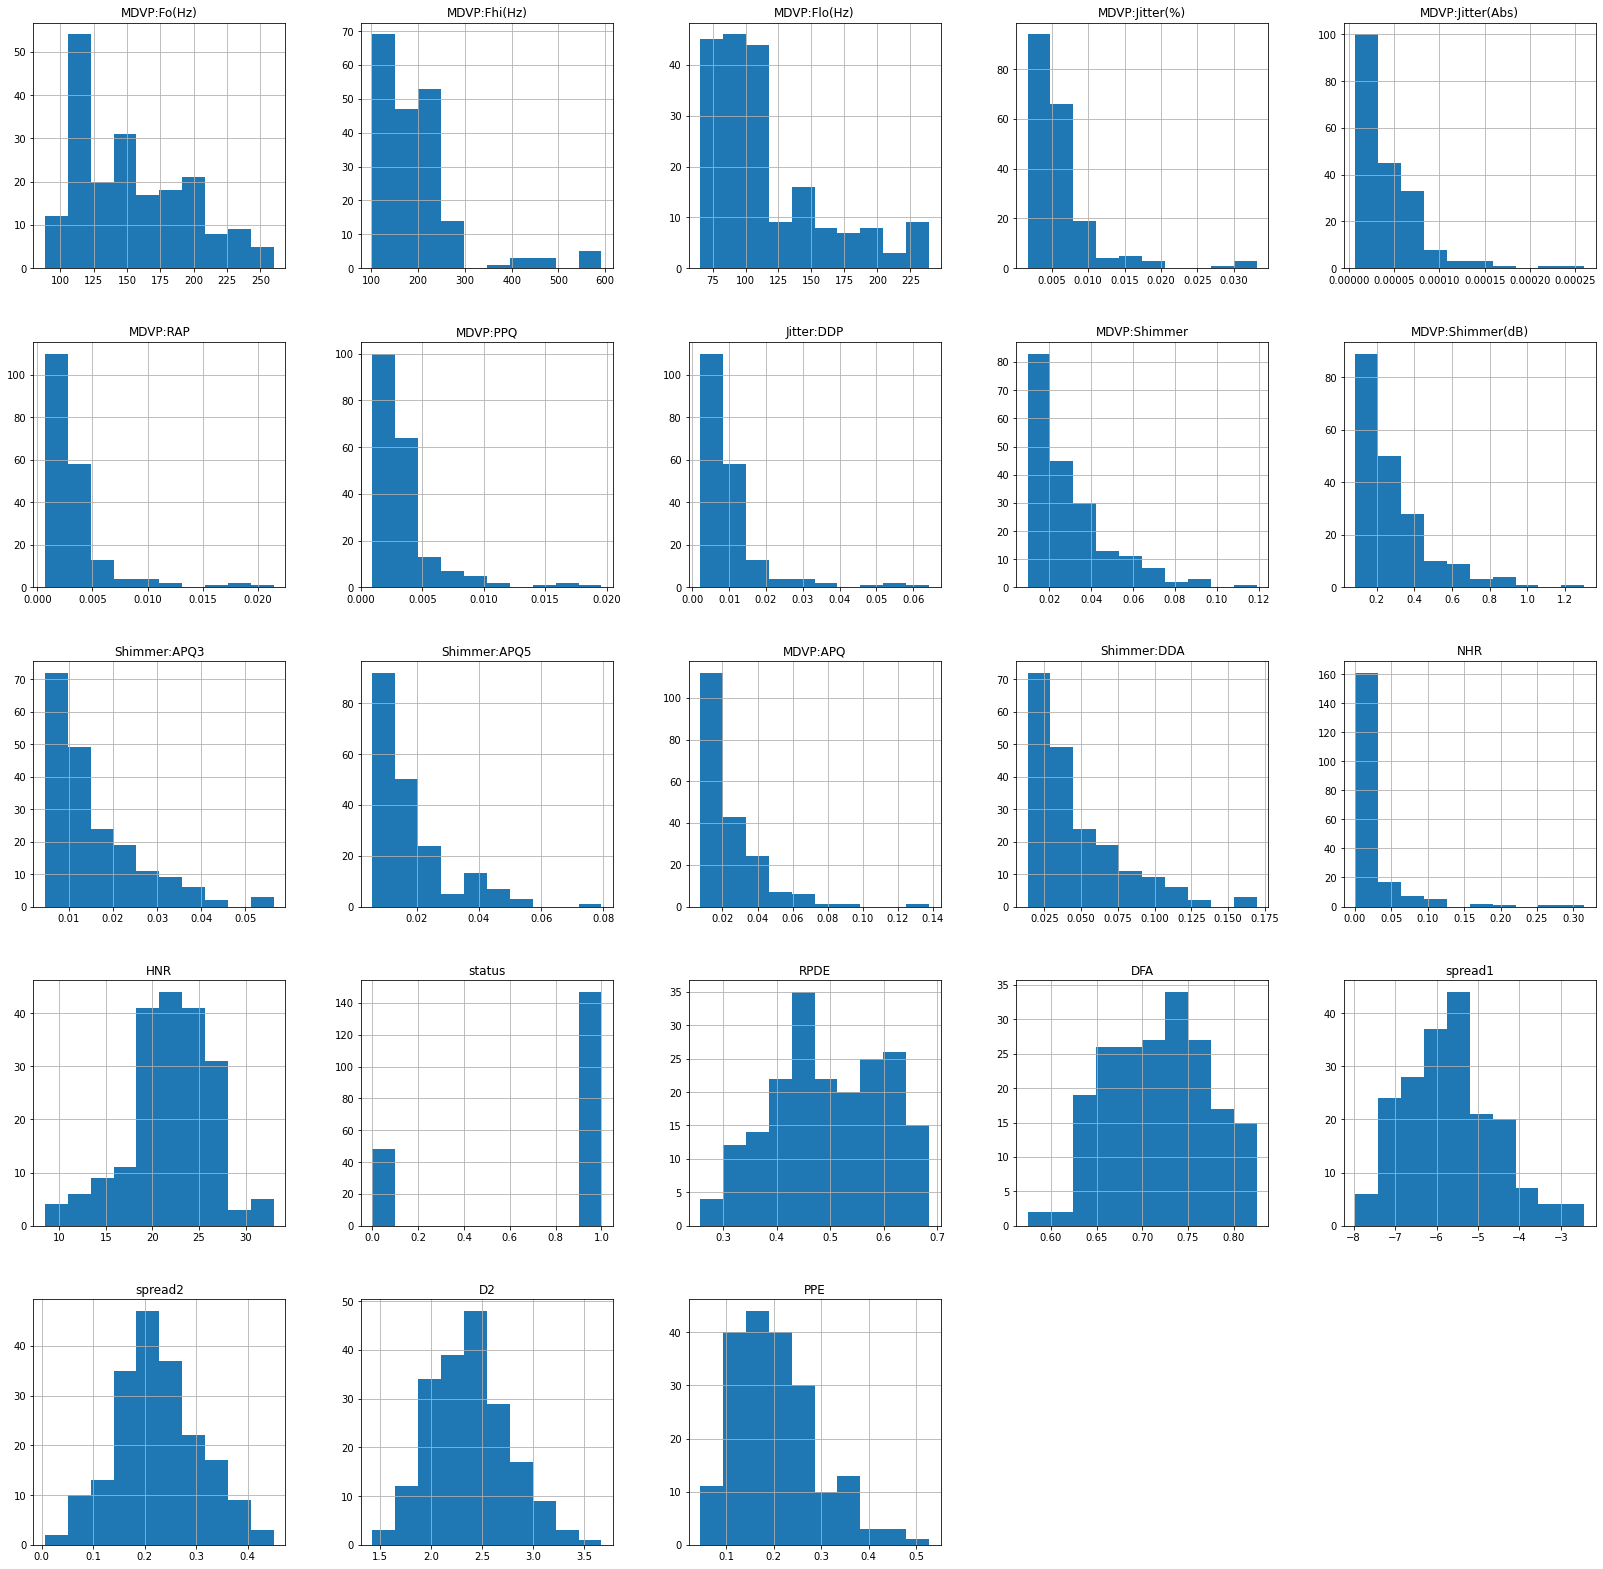

In [14]:
data.hist(figsize=(28,28))

In [16]:
dataset = data
all_cols = list(dataset.columns.values)
all_cols.remove('name')
all_cols

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [17]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
# summarize the fit of the model
print("KNeighborsClassifier: ")
print(metrics.accuracy_score(Y_test, y_pred))

KNeighborsClassifier: 
0.9795918367346939


In [18]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(22,18,12),max_iter=1500)
mlp.fit(X_train,Y_train)
y_pred = mlp.predict(X_test)
print("MLPClassifier: ")
print(metrics.accuracy_score(Y_test, y_pred))

MLPClassifier: 
0.9795918367346939


In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("XGBClassifier: ")
print(metrics.accuracy_score(Y_test, y_pred))

[14:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier: 
0.9795918367346939


C:\Users\USER\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [20]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal', input_dim=22))
#Second  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
classifier.fit(X_train,Y_train, batch_size=10, epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.7329
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.7397
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.7397
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.7397
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.7397
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7397
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7397
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7945
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8356
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8356
Epoch 11/

In [21]:
# evaluate the model
tscores = classifier.evaluate(X_test, Y_test)
print("Test Accuracy: %.2f%%" %(tscores[1]*100))

2/2 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9796
Test Accuracy: 97.96%


In [22]:
trscores=classifier.evaluate(X_train, Y_train)
print("Train Accuracy: %.2f%%" %(trscores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9863
Train Accuracy: 98.63%


In [23]:
y_pred=classifier.predict(X_test)

In [24]:
classifier.save_weights("ParkinsonsModelEP100.h5")
print("Saved model to disk")

Saved model to disk


In [25]:
model_json = classifier.to_json()
with open("ParkinsonsModelEP100.json", "w") as json_file:
    json_file.write(model_json)

In [26]:
from keras.models import model_from_json

json_file = open('ParkinsonsModelEP100.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("ParkinsonsModelEP100.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
# evaluate loaded model on test data
loaded_model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 97.96%


# Different Algorithms

In [28]:
from xgboost import Booster

model._Booster.save_model('model.bin')

def load_xgb_model():
    _m = XGBClassifier()
    _b = Booster()
    _b.load_model('model.bin')
    _m._Booster = _b
    return _m

model = load_xgb_model()

In [29]:
model.fit(X_train, Y_train)

[14:28:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
y_pred = model.predict(X_test)

In [31]:
model.score(X_test , Y_test) 

0.9795918367346939